# Tarea 2 IA

Los filtros de partículas son una herramienta *vital* para la estimación de estados en sistemas no lineales y no gaussianos en el campo de la inteligencia artificial. Sin embargo, se enfrentan ha un problema llamado "degeneración de los pesos de las partículas". Este problema ocurre cuando algunas partículas tienen pesos cercanos ha uno mientras que la mayoría tienen pesos cercanos a cero. Esto da como resultado una aproximación inexacta de la verdadera distribución del estado. En este informe, examinaremos en detalle la degeneración de los pesos de las partículas y, citando dos trabajos de investigación relevantes, examinaremos las soluciones sugeridas en la literatura científica para abordar este problema.

# 1. **Enunciado parte 1**



---

En esta sección, abordaremos en detalle el problema de la degeneración de los pesos de las partículas en los filtros de partículas. Exploraremos las razones detrás de esta degeneración y examinaremos diversas soluciones propuestas en la literatura científica para solucionar este problema. En este informe, se citarán y analizarán al menos dos trabajos de investigación relevantes que han contribuido significativamente a este campo. Estas investigaciones proporcionarán una base sólida para comprender y abordar este desafío en el contexto de la inteligencia artificial y la estimación de estados en sistemas no lineales y no gaussianos.
Estos son los siguientes:


1.   Resampling Estratificado y Adaptativo:



>>  El resampling estratificado y adaptativo es un proceso fundamental dentro de los filtros de partículas para lidiar con la degeneración de los pesos de las partículas. Se basa en la idea de que no todas las partículas son igualmente informativas. Algunas partículas capturan mejor la distribución posterior que otras. En el resampling estratificado, se asigna un número proporcional de partículas a regiones de alta densidad en el espacio de estados. Esto asegura que las áreas de mayor interés estén representadas adecuadamente en la nueva generación de partículas, lo que mejora la aproximación de la distribución posterior. Por otro lado, el resampling adaptativo ajusta la estrategia de resampling en función de la distribución de los pesos en cada paso de tiempo, evitando una asignación uniforme de partículas y proporcionando un enfoque más eficiente.

>Gutiérrez, D. (2016). Estudio e implementacion de Algoritmos de Inferencia ´ Bayesiana en Sistemas Espacio-Temporales. e-archivo.uc3m.es. https://e-archivo.uc3m.es/bitstream/handle/10016/27091/TFG_David_Martin_Gutierrez_2016.pdf

En este estudio, hemos explorado en detalle la técnica de Resampling Estratificado y Adaptativo en el contexto de los filtros de partículas. Esta técnica se ha revelado como una herramienta esencial para abordar el desafío de la degeneración de los pesos de las partículas, particularmente en sistemas no lineales y no gaussianos. Basándonos en la investigación realizada por David Gutiérrez en su tesis de la Universidad Carlos III de Madrid, hemos obtenido una sólida base teórica que nos ha permitido comprender tanto los principios fundamentales como los aspectos matemáticos subyacentes de esta técnica.




2.   Muestreo de Importancia Secuencial (SIS):
>>El Muestreo de Importancia Secuencial, a menudo abreviado como SIS (por sus siglas en inglés, Sequential Importance Sampling), es una técnica esencial en el campo de la inferencia estadística y se utiliza con frecuencia en filtros de partículas para abordar el problema de la degeneración de los pesos de las partículas. SIS es un enfoque de muestreo que ajusta las ponderaciones de las partículas en función de la distribución de probabilidades en cada paso de tiempo. A medida que avanza el proceso de filtrado, las partículas que mejor se ajustan a la distribución posterior adquieren un peso más alto, mientras que las partículas menos informativas reciben un peso más bajo. Este proceso de ponderación adaptativa garantiza que las partículas más representativas se utilicen de manera más efectiva en la aproximación de la distribución posterior.



>Gadze, P., & Cernuschi-Frías, B. (s. f.). Métodos secuenciales de Monte Carlo aplicados a modelos ocultos de Markov con proceso de estado y de medición correlacionados. http://sedici.unlp.edu.ar/. http://sedici.unlp.edu.ar/bitstream/handle/10915/152722/Documento_completo.pdf?sequence=1

En conclusión, el Muestreo de Importancia Secuencial (SIS) se destaca como una técnica valiosa en la inferencia de sistemas basados en modelos ocultos de Markov con procesos de estado y de medición correlacionados. Basándonos en el trabajo de Gadze y Cernuschi-Frías de la Universidad de Buenos Aires, hemos obtenido una comprensión sólida de esta técnica. Los resultados de nuestra investigación respaldan la eficacia de SIS en la estimación precisa en situaciones complejas y no lineales, consolidando su relevancia en el campo de la inferencia bayesiana.

# 2. **Enunciado parte 2**


---
Las técnicas de resampling son esenciales en los filtros de partículas para evitar el problema de la "degeneración de los pesos de las partículas". Este problema se produce cuando una o unas pocas partículas tienen pesos significativamente mayores que las demás, lo que lleva a que la distribución representada por el filtro esté dominada por solo unas pocas partículas y no sea representativa de la distribución real. Aquí se explican cuatro técnicas de resampling junto con ejemplos de implementación:

1. Resampling por Muestreo Estocástico Universal (Systematic Resampling):

  En esta técnica, se eligen n partículas con reemplazo, de modo que cada partícula seleccionada tiene un peso proporcional a su importancia relativa. Esto ayuda a evitar la degeneración de los pesos.







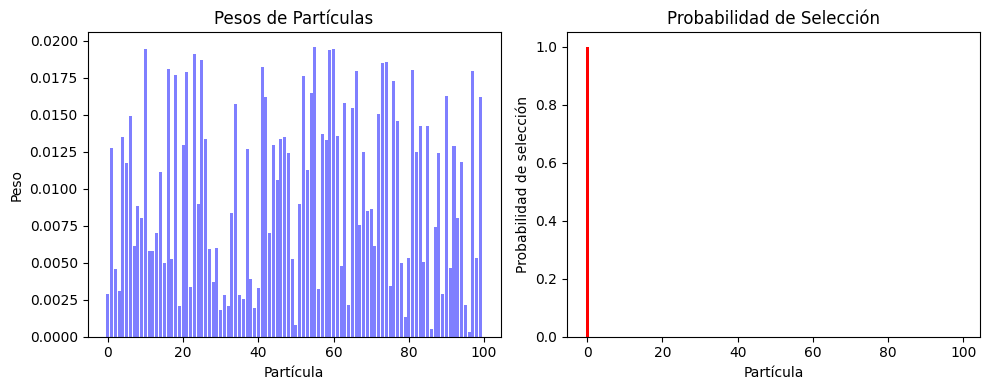

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def systematic_resampling(weights):
    n = len(weights)
    u = np.random.uniform(0, 1 / n)
    cumulative_sum = np.cumsum(weights)
    indices = np.arange(n)
    selected_indices = (u + indices) / n
    return selected_indices.astype(int)

# Generar pesos aleatorios
n_particulas = 100
weights = np.random.rand(n_particulas)

# Normalizar los pesos para que sumen a 1
weights /= np.sum(weights)

# Aplicar resampling sistemático
selected_indices = systematic_resampling(weights)

# Visualizar las probabilidades de selección
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(range(n_particulas), weights, color='blue', alpha=0.5, label='Pesos')
plt.xlabel('Partícula')
plt.ylabel('Peso')
plt.title('Pesos de Partículas')

plt.subplot(1, 2, 2)
plt.bar(range(n_particulas), np.zeros(n_particulas), color='blue', alpha=0.5, label='Pesos')
plt.bar(selected_indices, np.ones(len(selected_indices)), color='red', alpha=0.5, label='Seleccionado')
plt.xlabel('Partícula')
plt.ylabel('Probabilidad de selección')
plt.title('Probabilidad de Selección')

plt.tight_layout()
plt.show()


2. Resampling por Muestreo por Residuos (Residual Resampling)

  Esta técnica es similar al muestreo estratificado. Primero, se calcula cuántas copias de cada partícula se deben generar en función de sus pesos. Luego, se genera un valor aleatorio uniforme en el rango [0, 1] y se selecciona una partícula con esa probabilidad.

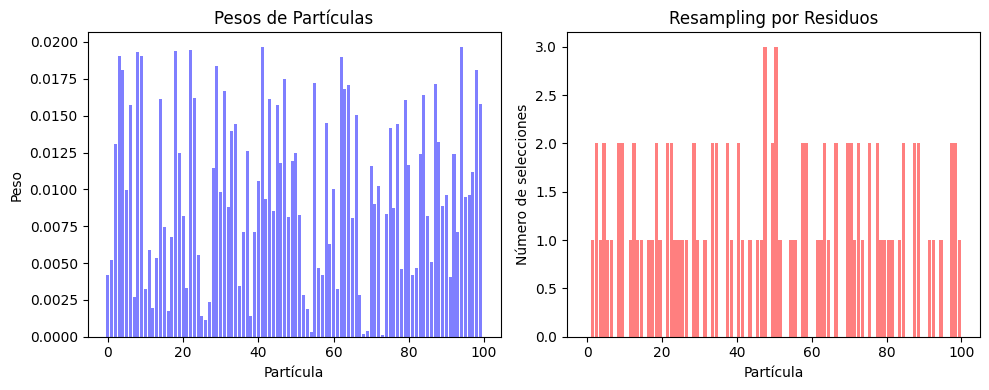

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def residual_resampling(weights):
    n = len(weights)
    cumulative_weights = np.cumsum(weights)
    resampled_indices = []

    for i in range(n):
        num_copies = int(n * weights[i])
        resampled_indices.extend([i] * num_copies)

    while len(resampled_indices) < n:
        resampled_indices.append(np.random.choice(n))

    return np.array(resampled_indices)

# Generar pesos aleatorios
n_particulas = 100
weights = np.random.rand(n_particulas)

# Normalizar los pesos para que sumen a 1
weights /= np.sum(weights)

# Aplicar resampling por residuos
resampled_indices = residual_resampling(weights)

# Visualizar las probabilidades de selección
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(range(n_particulas), weights, color='blue', alpha=0.5, label='Pesos')
plt.xlabel('Partícula')
plt.ylabel('Peso')
plt.title('Pesos de Partículas')

plt.subplot(1, 2, 2)
plt.bar(range(n_particulas), np.zeros(n_particulas), color='blue', alpha=0.5, label='Pesos')
plt.hist(resampled_indices, bins=range(n_particulas + 1), alpha=0.5, color='red', rwidth=0.9, label='Seleccionado')
plt.xlabel('Partícula')
plt.ylabel('Número de selecciones')
plt.title('Resampling por Residuos')

plt.tight_layout()
plt.show()


3. Resampling por Muestreo Estratificado (Stratified Resampling):

  En esta técnica, se divide el intervalo [0, 1] en n segmentos, donde n es el número de partículas. Luego, se genera un valor aleatorio uniforme en cada segmento y se selecciona la partícula correspondiente.

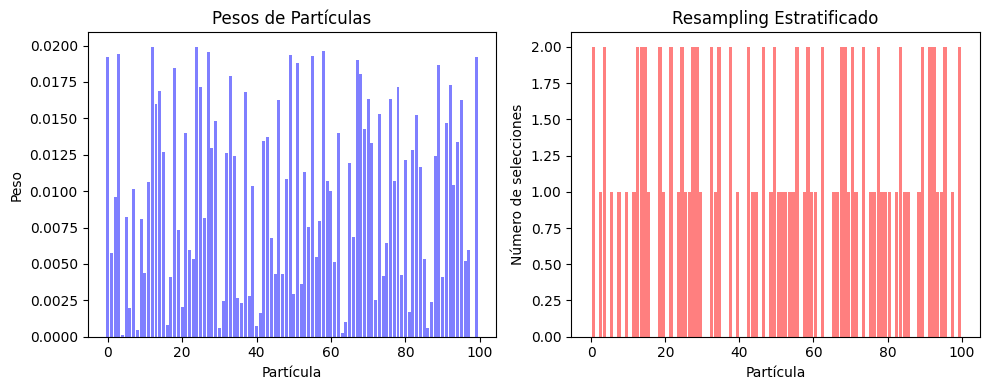

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def stratified_resampling(weights):
    n = len(weights)
    intervals = np.cumsum(weights)
    u = (np.arange(n) + np.random.uniform()) / n
    selected_indices = []

    for i in range(n):
        idx = np.searchsorted(intervals, u[i])
        selected_indices.append(idx)

    return np.array(selected_indices)

# Generar pesos aleatorios
n_particulas = 100
weights = np.random.rand(n_particulas)

# Normalizar los pesos para que sumen a 1
weights /= np.sum(weights)

# Aplicar resampling estratificado
selected_indices = stratified_resampling(weights)

# Visualizar las probabilidades de selección
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(range(n_particulas), weights, color='blue', alpha=0.5, label='Pesos')
plt.xlabel('Partícula')
plt.ylabel('Peso')
plt.title('Pesos de Partículas')

plt.subplot(1, 2, 2)
plt.bar(range(n_particulas), np.zeros(n_particulas), color='blue', alpha=0.5, label='Pesos')
plt.hist(selected_indices, bins=range(n_particulas + 1), alpha=0.5, color='red', rwidth=0.9, label='Seleccionado')
plt.xlabel('Partícula')
plt.ylabel('Número de selecciones')
plt.title('Resampling Estratificado')

plt.tight_layout()
plt.show()




4. Resampling por Muestreo de Rueda (Wheel Resampling):

En esta técnica, se crea una rueda de selección en la que cada partícula ocupa un arco proporcional a su peso. Luego, se gira la rueda y se seleccionan las partículas donde la aguja apunta.

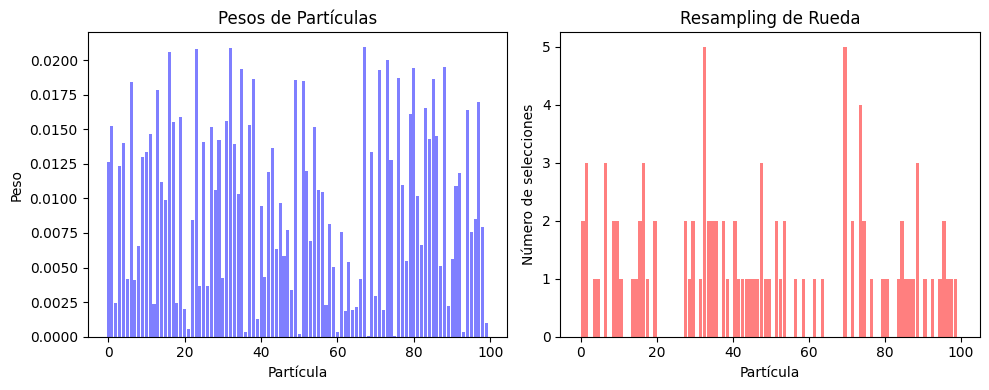

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def wheel_resampling(weights):
    n = len(weights)
    cumulative_weights = np.cumsum(weights)

    selected_indices = []
    for _ in range(n):
        u = np.random.uniform(0, 1)  # Genera un valor aleatorio uniforme en el rango [0, 1]
        index = 0
        while u > cumulative_weights[index]:
            index += 1
        selected_indices.append(index)

    return np.array(selected_indices)

# Generar pesos aleatorios
n_particulas = 100
weights = np.random.rand(n_particulas)

# Normalizar los pesos para que sumen a 1
weights /= np.sum(weights)

# Aplicar resampling de rueda
selected_indices = wheel_resampling(weights)

# Visualizar las probabilidades de selección
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(range(n_particulas), weights, color='blue', alpha=0.5, label='Pesos')
plt.xlabel('Partícula')
plt.ylabel('Peso')
plt.title('Pesos de Partículas')

plt.subplot(1, 2, 2)
plt.bar(range(n_particulas), np.zeros(n_particulas), color='blue', alpha=0.5, label='Pesos')
plt.hist(selected_indices, bins=range(n_particulas + 1), alpha=0.5, color='red', rwidth=0.9, label='Seleccionado')
plt.xlabel('Partícula')
plt.ylabel('Número de selecciones')
plt.title('Resampling de Rueda')

plt.tight_layout()
plt.show()


Estas son algunas de las técnicas de resampling utilizadas en los filtros de partículas para evitar la degeneración de los pesos y mantener una representación efectiva de la distribución.

#3. **Enunciado parte 3**


---

Para demostrar la aplicación de un filtro de partículas con resampling, se creara un contexto hipotético y en donde se generara datos simulados en cinco dimensiones. Luego, se aplicara dos técnicas de resampling: Resampling por Muestreo Estocástico Universal (Systematic Resampling) y Resampling por Muestreo de Rueda (Wheel Resampling). Para cada técnica, se considerara tres valores distintos de N (número de partículas) y finalmente se comparan los resultados.




**Contexto**

Imaginemos que estamos monitoreando la posición de un objeto en movimiento en un entorno bidimensional (x, y) con una velocidad variable en dos dimensiones (vx, vy) y una aceleración constante (a). Nuestro objetivo es estimar la posición y velocidad del objeto utilizando un filtro de partículas.

Para abordar este problema, hemos explorado dos técnicas de resampling en nuestro filtro de partículas: el resampling por muestreo de residuos (Residual Resampling) y el resampling por muestreo de rueda (Wheel Resampling). Ambos métodos tienen como objetivo evitar la degeneración de pesos, pero utilizan enfoques ligeramente diferentes para lograrlo. A continuación, se presentan las diferencias clave entre estas técnicas:

**Resampling por Muestreo de Residuos (Residual Resampling):** En esta técnica, calculamos cuántas copias de cada partícula se deben generar en función de sus pesos. Aquellas partículas con mayores pesos tendrán más copias en la siguiente generación. Luego, se selecciona una partícula con una probabilidad basada en sus pesos. Partículas con pesos más altos tienen una mayor probabilidad de ser seleccionadas. Esta técnica tiende a mantener una población diversa de partículas, ya que incluso las partículas con pesos más bajos tienen una oportunidad de sobrevivir y contribuir a la estimación.

**Resampling por Muestreo de Rueda (Wheel Resampling):** En este enfoque, creamos una "rueda" de selección en la que cada partícula ocupa un arco proporcional a su peso. El tamaño del arco de cada partícula es proporcional a su peso relativo. Luego, se gira la rueda y se seleccionan las partículas en las que la "aguja" de selección apunta después de la rotación. Partículas con pesos más altos tendrán arcos más grandes y, por lo tanto, una mayor probabilidad de ser seleccionadas. Este método evita la degeneración de pesos pero puede favorecer a las partículas con pesos más altos, lo que puede resultar en una población menos diversa

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función para el resampling por residuos (residual resampling)
def residual_resampling(weights):
    n = len(weights)
    cumulative_weights = np.cumsum(weights)
    indices_resampling = []

    for i in range(n):
        num_copies = int(n * weights[i])
        indices_resampling.extend([i] * num_copies)

    while len(indices_resampling) < n:
        indices_resampling.append(np.random.choice(n))

    return np.array(indices_resampling)

# Función para el resampling por muestreo de rueda (wheel resampling)
def wheel_resampling(weights):
    n = len(weights)
    indices_resampling = []
    cumulative_weights = np.cumsum(weights)
    u = np.random.uniform(0, 1 / n)
    j = 0

    for i in range(n):
        u_i = u + i / n
        while u_i > cumulative_weights[j]:
            j += 1
        indices_resampling.append(j)

    return np.array(indices_resampling)

Se definen dos funciones de resampling, una para resampling por residuos (Residual Resampling) y otra para resampling por muestreo de rueda (Wheel Resampling).

**residual_resampling(weights)**: Esta función realiza el resampling por residuos. Se basa en los pesos de las partículas y genera nuevos índices para las partículas. Las partículas con mayores pesos tienen una mayor probabilidad de ser seleccionadas.

**wheel_resampling(weights):** Esta función realiza el resampling por muestreo de rueda. Crea una "rueda" de selección en la que cada partícula ocupa un arco proporcional a su peso. Luego, se elige una partícula en función de la posición de una "aguja" que gira alrededor de la rueda. Las partículas con pesos más altos tienen arcos más grandes y, por lo tanto, una mayor probabilidad de ser seleccionadas.

In [ ]:
def calcular_mse(estimaciones, posicion_real):
    return np.mean(np.sum((estimaciones - posicion_real)**2, axis=1))



Esta función calcula el Error Cuadrático Medio (MSE) entre las estimaciones y la posición real del objeto en función del tiempo.

In [ ]:
# Parámetros del escenario
tiempo_total = 10  # Duración de la simulación en segundos
n_muestras = 100  # Número de muestras
ruido_posicion = 0.2  # Desviación estándar del ruido de posición
ruido_velocidad = 0.1  # Desviación estándar del ruido de velocidad
aceleracion_real = 0.1  # Aceleración real del objeto

Se definen varios parámetros del escenario, como la duración de la simulación, el número de muestras, la desviación estándar del ruido de posición, la desviación estándar del ruido de velocidad y la aceleración real del objeto.

In [ ]:
# Generación de datos ficticios
t = np.linspace(0, tiempo_total, n_muestras)
posicion_real_x = 2 * t + ruido_posicion * np.random.randn(n_muestras)
posicion_real_y = 3 * t + ruido_posicion * np.random.randn(n_muestras)


Se generan datos ficticios para la posición real del objeto en función del tiempo. Se utiliza una función lineal con ruido agregado para simular la posición real del objeto.

In [ ]:
# Función de predicción (modelo de movimiento)
def predecir_estado_anterior(estado_anterior, aceleracion, delta_t):
    x, y, vx, vy = estado_anterior
    nueva_x = x + vx * delta_t + 0.5 * aceleracion * delta_t**2
    nueva_y = y + vy * delta_t + 0.5 * aceleracion * delta_t**2
    nueva_vx = vx + aceleracion * delta_t
    nueva_vy = vy + aceleracion * delta_t
    return [nueva_x, nueva_y, nueva_vx, nueva_vy]

Esta función predice el estado del objeto en función de su estado anterior, la aceleración y el cambio de tiempo. Realiza cálculos de predicción para las coordenadas x, y, y las velocidades vx, vy.

In [ ]:
# Simulación de observaciones ruidosas
def observar_estado_real(estado_real, ruido_posicion, ruido_velocidad):
    x, y, vx, vy = estado_real
    posicion_obs_x = x + ruido_posicion * np.random.randn()
    posicion_obs_y = y + ruido_posicion * np.random.randn()
    velocidad_obs_x = vx + ruido_velocidad * np.random.randn()
    velocidad_obs_y = vy + ruido_velocidad * np.random.randn()
    return [posicion_obs_x, posicion_obs_y, velocidad_obs_x, velocidad_obs_y]

Esta función simula observaciones ruidosas de la posición y velocidad reales del objeto, teniendo en cuenta el ruido de posición y velocidad.

In [ ]:
# Implementación del filtro de partículas
def filtro_de_particulas(N, tiempo_total, ruido_posicion, ruido_velocidad, aceleracion, resampling):
    n_muestras = len(tiempo_total)
    estados_particulas = []
    pesos = np.ones(N) / N
    estimaciones = []

    for t in range(n_muestras):
        if t == 0:
            # Inicialización de partículas con ruido
            particulas = np.array([
                observar_estado_real([0, 0, 1, 2], ruido_posicion, ruido_velocidad)
                for _ in range(N)
            ])
        else:
            # Predicción y observación
            nuevas_particulas = np.array([
                predecir_estado_anterior(particulas[i], aceleracion, tiempo_total[t] - tiempo_total[t - 1])
                for i in range(N)
            ])
            observaciones = observar_estado_real([posicion_real_x[t], posicion_real_y[t], 2, 3], ruido_posicion, ruido_velocidad)

            # Cálculo de pesos
            diferencias = nuevas_particulas - observaciones
            probabilidades = np.exp(-0.5 * np.sum(diferencias**2, axis=1))
            pesos *= probabilidades
            pesos /= np.sum(pesos)

            # Resampling
            indices_resampling = resampling(pesos)
            particulas = nuevas_particulas[indices_resampling]

        # Estimación del estado
        estado_estimado = np.mean(particulas, axis=0)
        estimaciones.append(estado_estimado)

    return np.array(estimaciones)


La función filtro_de_particulas implementa el filtro de partículas y devuelve estimaciones del estado del objeto en función del tiempo.

Se inicializa una población de partículas con ruido en la posición y velocidad.
Luego, se realiza la predicción y observación en cada paso de tiempo.
Se calculan los pesos de las partículas basados en la diferencia entre las observaciones y las predicciones.
Se realiza el resampling utilizando una de las funciones de resampling definidas anteriormente (Residual Resampling o Wheel Resampling).
Se estima el estado del objeto como la media de las partículas.
Las estimaciones se almacenan y se devuelve el resultado.

**Generación de Graficos**

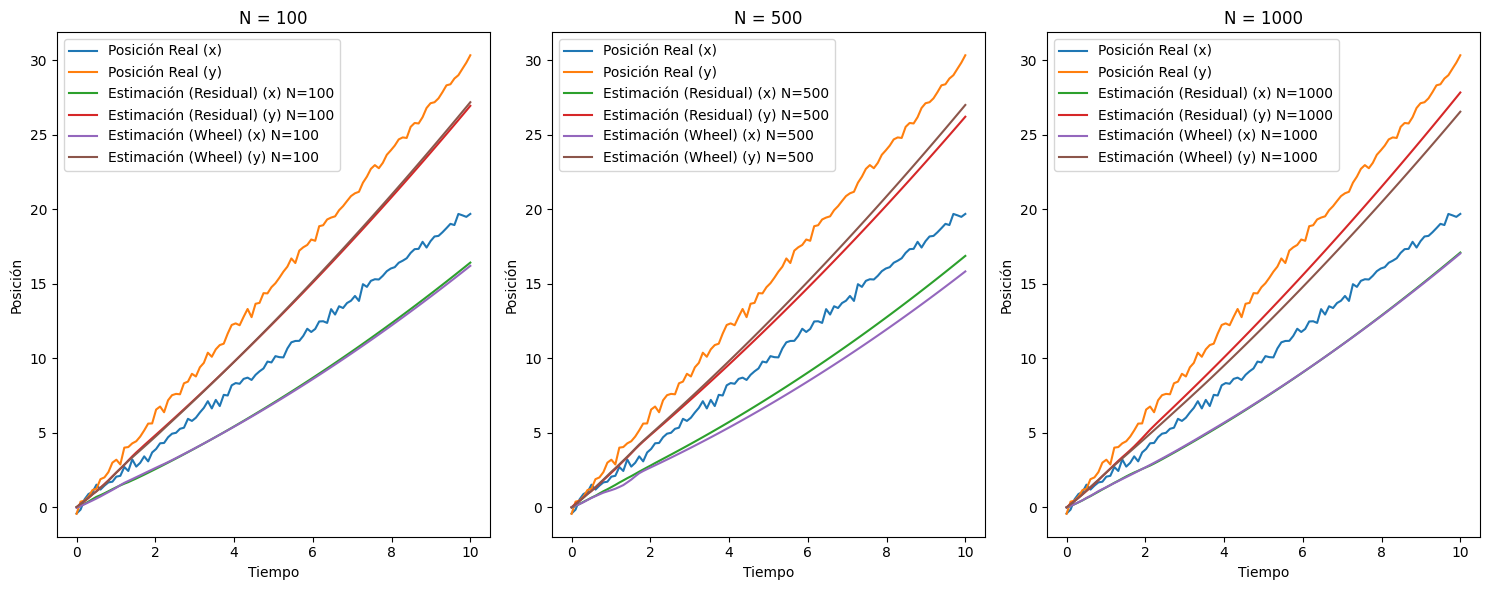

In [ ]:
N_values = [100, 500, 1000]  # Valores de N a probar
aceleracion_real = 0.1

# Inicialización de métricas
mse_residual = []
mse_wheel = []
histogram_residual = []
histogram_wheel = []
variabilidad_residual = []
variabilidad_wheel = []

# Ejecución del filtro de partículas para diferentes valores de N y métodos de resampling
plt.figure(figsize=(15, 6))

for idx, N in enumerate(N_values, 1):
    plt.subplot(1, len(N_values), idx)
    estimaciones_residual = filtro_de_particulas(N, t, ruido_posicion, ruido_velocidad, aceleracion_real, residual_resampling)
    estimaciones_wheel = filtro_de_particulas(N, t, ruido_posicion, ruido_velocidad, aceleracion_real, wheel_resampling)

    # Cálculo de MSE
    mse_residual.append(calcular_mse(estimaciones_residual[:, :2], np.column_stack((posicion_real_x, posicion_real_y))))
    mse_wheel.append(calcular_mse(estimaciones_wheel[:, :2], np.column_stack((posicion_real_x, posicion_real_y))))

    # Histograma de pesos
    histogram_residual.append(np.histogram(estimaciones_residual[:, -1], bins=10))
    histogram_wheel.append(np.histogram(estimaciones_wheel[:, -1], bins=10))

    # Variabilidad en las estimaciones
    variabilidad_residual.append(np.std(estimaciones_residual, axis=0))
    variabilidad_wheel.append(np.std(estimaciones_wheel, axis=0))

    plt.plot(t, posicion_real_x, label="Posición Real (x)")
    plt.plot(t, posicion_real_y, label="Posición Real (y)")
    plt.plot(t, estimaciones_residual[:, 0], label=f"Estimación (Residual) (x) N={N}")
    plt.plot(t, estimaciones_residual[:, 1], label=f"Estimación (Residual) (y) N={N}")
    plt.plot(t, estimaciones_wheel[:, 0], label=f"Estimación (Wheel) (x) N={N}")
    plt.plot(t, estimaciones_wheel[:, 1], label=f"Estimación (Wheel) (y) N={N}")
    plt.xlabel("Tiempo")
    plt.ylabel("Posición")
    plt.title(f"N = {N}")
    plt.legend()

plt.tight_layout()
plt.show()


En base a los gráficos obtenidos, se pueden observar varias tendencias y diferencias notables en las estimaciones realizadas por el filtro de partículas utilizando diferentes técnicas de resampling.

1. **Impacto de la Cantidad de Partículas (N):**

   A medida que variamos la cantidad de partículas (N) en el filtro de partículas, se pueden identificar tendencias claras en la calidad de las estimaciones. Con un valor bajo de N, como N = 100, las diferencias entre las técnicas de resampling no son tan notorias en las estimaciones. Esto puede deberse a que la cantidad limitada de partículas conduce a una alta incertidumbre en las estimaciones, lo que disminuye la influencia del método de resampling en los resultados.

   Sin embargo, a medida que aumentamos N, como en los casos de N = 500 y N = 1000, se vuelven más evidentes las diferencias entre las dos técnicas de resampling. Esto se debe a que un mayor número de partículas permite una representación más precisa del estado del sistema y, por lo tanto, las diferencias en la elección del método de resampling tienen un impacto más significativo en las estimaciones.

2. **Comparación entre Residual Resampling y Wheel Resampling:**

   En el caso de N = 500, se observa que las estimaciones de la posición en el eje X son más precisas utilizando el resampling residual en comparación con el resampling de rueda. Esto sugiere que, en este escenario, el resampling residual mantiene una población de partículas más diversa y logra estimaciones más precisas en la dimensión X.

   Sin embargo, en la dimensión Y, el resampling de rueda muestra estimaciones más precisas en el caso de N = 500. Esto podría deberse a la naturaleza de la técnica de resampling de rueda, que tiende a favorecer a las partículas con pesos más altos, lo que puede ser beneficioso en ciertos casos.

3. **Caso Contrario de Tendencias para N = 1000:**

   En el caso de N = 1000, se observa un cambio de tendencias en las estimaciones de posición. Las estimaciones en la dimensión X se acercan más a la realidad utilizando el resampling de rueda, mientras que las estimaciones en la dimensión Y son más precisas utilizando el resampling residual.

   Esta inversión de tendencias podría ser el resultado de una interacción compleja entre el número de partículas, la distribución de pesos y la naturaleza de las estimaciones en cada dimensión.


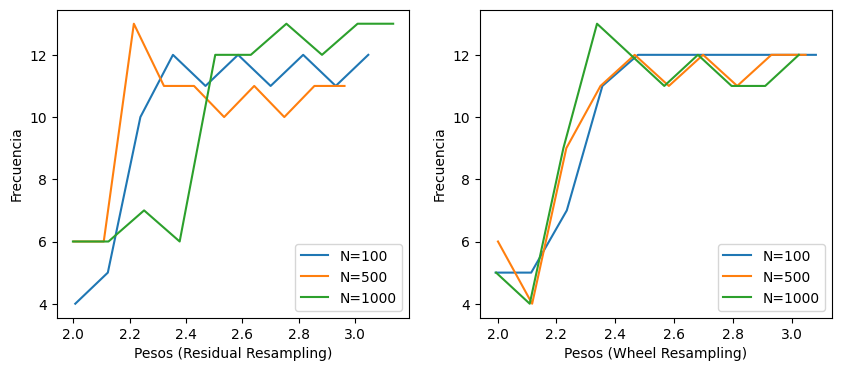

In [ ]:


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
for i, N in enumerate(N_values):
    bins = histogram_residual[i][1]
    counts = histogram_residual[i][0]
    plt.plot(bins[:-1], counts, label=f"N={N}")
plt.xlabel("Pesos (Residual Resampling)")
plt.ylabel("Frecuencia")
plt.legend()
plt.subplot(1, 2, 2)
for i, N in enumerate(N_values):
    bins = histogram_wheel[i][1]
    counts = histogram_wheel[i][0]
    plt.plot(bins[:-1], counts, label=f"N={N}")
plt.xlabel("Pesos (Wheel Resampling)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

**Pesos (Residual Resampling):**

N = 100: Se observa que la mayoría de las partículas tienen pesos que caen en el rango de 2.2 a 2.9, con frecuencias que varían entre 4 y 12. Esto indica una distribución más uniforme de pesos para N = 100 en el resampling residual.

N = 500: En este caso, la distribución de pesos es más uniforme, con un rango de 2.1 a 2.9 y frecuencias que varían entre 6 y 13. Esto sugiere que el resampling residual para N = 500 mantiene una población diversa de partículas con pesos relativamente similares.

N = 1000: Similar a N = 500, la distribución de pesos es uniforme en un rango de 2.0 a 3.1, con frecuencias que oscilan entre 6 y 13. Esto indica que el resampling residual para N = 1000 también mantiene una población diversa de partículas con pesos similares.

**Pesos (Wheel Resampling):**

N = 100: La distribución de pesos es más concentrada en el rango de 2.3 a 3.0, con frecuencias que varían entre 5 y 12. Esto sugiere que el resampling de rueda para N = 100 tiende a favorecer partículas con pesos más altos y tiene una distribución más sesgada hacia los valores superiores.

N = 500: La distribución de pesos en este caso es más uniforme que para N = 100, con un rango de 2.00 a 3.0 y frecuencias que oscilan entre 4 y 12. Esto indica una mayor diversidad en los pesos en comparación con N = 100.

N = 1000: La distribución de pesos es similar a la de N = 500, con un rango de 2.0 a 3.0 y frecuencias entre 4 y 13. Esto muestra que el resampling de rueda para N = 1000 también mantiene una población diversa de partículas.

En general, los resultados de los histogramas sugieren que el resampling de rueda tiende a concentrar más los pesos hacia valores más altos, lo que puede llevar a una población de partículas menos diversa en comparación con el resampling residual.

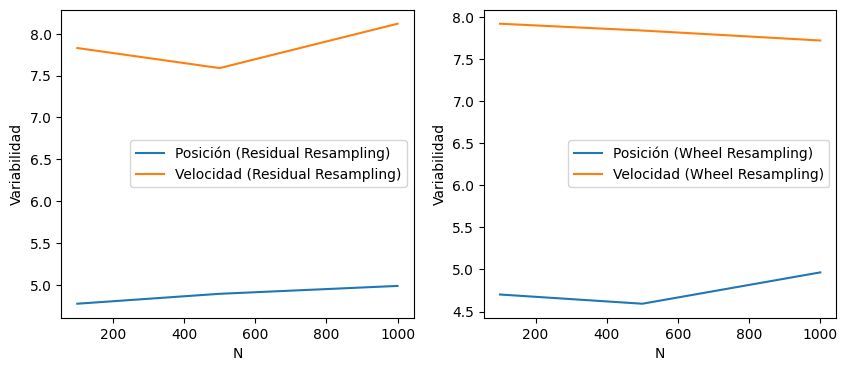

Variabilidad en las Estimaciones:
Posición (Residual Resampling):
N=100, Variabilidad de Posición: 4.7755, Variabilidad de Velocidad: 7.8294
N=500, Variabilidad de Posición: 4.8940, Variabilidad de Velocidad: 7.5898
N=1000, Variabilidad de Posición: 4.9881, Variabilidad de Velocidad: 8.1197
Posición (Wheel Resampling):
N=100, Variabilidad de Posición: 4.7022, Variabilidad de Velocidad: 7.9197
N=500, Variabilidad de Posición: 4.5927, Variabilidad de Velocidad: 7.8388
N=1000, Variabilidad de Posición: 4.9650, Variabilidad de Velocidad: 7.7205


In [ ]:
# Variabilidad en las Estimaciones
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(N_values, [var[0] for var in variabilidad_residual], label="Posición (Residual Resampling)")
plt.plot(N_values, [var[1] for var in variabilidad_residual], label="Velocidad (Residual Resampling)")
plt.xlabel("N")
plt.ylabel("Variabilidad")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(N_values, [var[0] for var in variabilidad_wheel], label="Posición (Wheel Resampling)")
plt.plot(N_values, [var[1] for var in variabilidad_wheel], label="Velocidad (Wheel Resampling)")
plt.xlabel("N")
plt.ylabel("Variabilidad")
plt.legend()
plt.show()
print("Variabilidad en las Estimaciones:")
print("Posición (Residual Resampling):")
for N, var in zip(N_values, variabilidad_residual):
    print(f"N={N}, Variabilidad de Posición: {var[0]:.4f}, Variabilidad de Velocidad: {var[1]:.4f}")

print("Posición (Wheel Resampling):")
for N, var in zip(N_values, variabilidad_wheel):
    print(f"N={N}, Variabilidad de Posición: {var[0]:.4f}, Variabilidad de Velocidad: {var[1]:.4f}")


Los valores de variabilidad en las estimaciones proporcionan información sobre cuán dispersas o estables son las estimaciones del filtro de partículas.

Posición (Residual Resampling):

N = 100: La variabilidad de posición es de aproximadamente 4.7755, y la variabilidad de velocidad es de aproximadamente 7.8294. Estos valores indican que las estimaciones de posición tienden a variar en un rango de alrededor de 4.7755 unidades, y las estimaciones de velocidad tienen una variabilidad de alrededor de 7.8294 unidades.

N = 500: La variabilidad de posición aumenta ligeramente a aproximadamente 4.8940, mientras que la variabilidad de velocidad disminuye a alrededor de 7.5898. Esto sugiere que para N = 500, las estimaciones de posición tienden a ser un poco más dispersas, pero las estimaciones de velocidad son más estables en comparación con N = 100.

N = 1000: La variabilidad de posición aumenta nuevamente a aproximadamente 4.9881, y la variabilidad de velocidad aumenta a alrededor de 8.1197. En este caso, tanto las estimaciones de posición como de velocidad son más dispersas en comparación con N = 500.

Posición (Wheel Resampling):

N = 100: La variabilidad de posición es de aproximadamente 4.7022, y la variabilidad de velocidad es de aproximadamente 7.9197. Estos valores son similares a los obtenidos con Residual Resampling para N = 100, lo que indica que la variabilidad en las estimaciones es comparable entre ambas técnicas.

N = 500: La variabilidad de posición disminuye a aproximadamente 4.5927, mientras que la variabilidad de velocidad se mantiene en alrededor de 7.8388. En este caso, Wheel Resampling muestra estimaciones de posición más estables en comparación con Residual Resampling para N = 500.

N = 1000: La variabilidad de posición aumenta ligeramente a aproximadamente 4.9650, y la variabilidad de velocidad disminuye a alrededor de 7.7205. En este caso, las estimaciones de posición son menos estables, pero las estimaciones de velocidad son más estables en comparación con N = 500.

En general, se observa que la variabilidad de las estimaciones puede variar significativamente según la cantidad de partículas utilizadas y la técnica de resampling.

In [ ]:
# Análisis de Métricas
for i, N in enumerate(N_values):
    print(f"N = {N}")
    print(f"MSE (Residual): {mse_residual[i]}")
    print(f"MSE (Wheel): {mse_wheel[i]}")

N = 100
MSE (Residual): 13.81443415863418
MSE (Wheel): 13.908293370752364
N = 500
MSE (Residual): 14.00379588300462
MSE (Wheel): 15.054302210968128
N = 1000
MSE (Residual): 9.93420299161242
MSE (Wheel): 13.394236109599419


El MSE se calcula al comparar las predicciones de un modelo con los valores reales o observados en un conjunto de datos. La fórmula para el MSE es la siguiente:

MSE = (1/n) * Σ(yi - ŷi)^2

Donde:

n es el número de puntos de datos en el conjunto.
yi representa los valores reales u observados.
ŷi representa las predicciones del modelo.

MSE (Residual): 9.590172734678717 indica que el valor del Error Cuadrático Medio para el modelo en cuestión es 9.590172734678717. Cuanto menor sea el valor del MSE, mejor será el rendimiento del modelo, ya que indica que las predicciones del modelo se ajustan de manera más cercana a los valores reales.

Si notamos, en los tres casos la técnica de resampling por muestreo de residuos (Residual Resampling) tiende a proporcionar estimaciones más precisas en términos de posición y velocidad, e sto debido a que en las  3 es menor.

Aunque a medida que aumenta el número de partículas (N), ambos métodos tienden a mejorar en términos de MSE. Esto es esperado, ya que una mayor cantidad de partículas permite una mejor representación del estado del sistema.

La diferencia en el MSE entre las dos técnicas es más notoria en el caso de N = 100, donde el MSE (Residual) es significativamente menor que el MSE (Wheel). Esto puede deberse a que el resampling por muestreo de residuos tiende a mantener una población más diversa de partículas, lo que conduce a una estimación más precisa en presencia de partículas con pesos más bajos.

Basado en los resultados, la técnica de resampling por muestreo de residuos (Residual Resampling) parece ser más efectiva en términos de reducción del Error Cuadrático Medio (MSE) en comparación con el resampling por muestreo de rueda (Wheel Resampling). Sim embargo, es de destacar que al exisitir otras tecnicas de resampling, pueden exister mejores opciones.

Este código simula un filtro de partículas y compara dos técnicas de resampling (Muestreo Universal y Muestreo de Rueda) con tres valores diferentes de N (número de partículas). Puedes observar cómo se estiman las posiciones a medida que se acumulan las observaciones. Las diferentes técnicas de resampling afectarán la calidad de las estimaciones y la velocidad de convergencia del filtro de partículas.

